In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import warnings
warnings.filterwarnings('ignore')

In [2]:
mean1 = np.array([1,2])
cov1 = np.array([[2.4,1.5],[1.5,3.5]])

mean2 = np.array([8,10])
cov2 = np.array([[2.3,1.6],[1.6,3.8]])

dist_01 = np.random.multivariate_normal(mean1,cov1,500)
dist_02 = np.random.multivariate_normal(mean2,cov2,500)

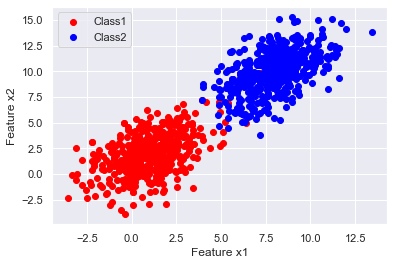

In [3]:
plt.scatter(dist_01[:,0],dist_01[:,1],color = 'red')
plt.scatter(dist_02[:,0],dist_02[:,1],color = 'blue')
plt.xlabel('Feature x1')
plt.ylabel('Feature x2')
plt.legend(['Class1','Class2'])
plt.show()

In [4]:
data = np.zeros((1000,3))

In [5]:
data[:500,:2] = dist_01
data[500:,:2] = dist_02

data[500:,-1] = 1

##### Let's Shuffle the data

In [6]:
np.random.shuffle(data)

In [7]:
split = int(0.8*data.shape[0])

X_train = data[:split,:-1]
X_test = data[split:,:-1]

Y_train = data[:split,-1]
Y_test = data[split:,-1]

In [8]:
print(X_train.shape,X_test.shape,Y_train.shape,Y_test.shape)

(800, 2) (200, 2) (800,) (200,)


##### Let's Normalize the data

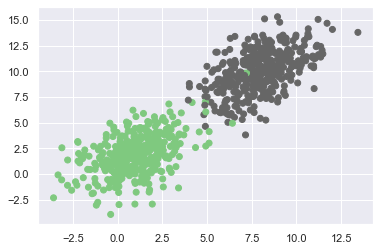

In [9]:
plt.scatter(X_train[:,0],X_train[:,1],c = Y_train, cmap = plt.cm.Accent)
plt.show()

In [10]:
x_mean = X_train.mean(axis = 0)
x_std = X_train.std(axis = 0)

X_train = (X_train - x_mean) / x_std
X_test = (X_test - x_mean) / x_std

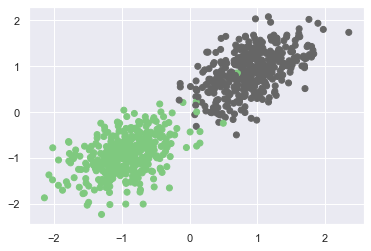

In [11]:
plt.scatter(X_train[:,0],X_train[:,1],c = Y_train, cmap = plt.cm.Accent)
plt.show()

##### Now let's create Logistic Regression Model

In [12]:
def sigmoid(x):
    sig = 1 / (1 + np.exp(-x))
    return sig

In [13]:
def hypothesis(X,theta):
    return sigmoid(np.dot(X,theta))

In [14]:
def loss(X,y,theta):
    hi = hypothesis(X,theta)
    
    err = -1 * np.mean((y * np.log(hi)) + ((1 - y) * np.log(1 - hi)))
    
    return err

In [15]:
def gradient(X,y,theta):
    hi = hypothesis(X,theta)
    grad = np.dot(X.T,(y - hi))
    m = X.shape[0]
    
    return grad/m

In [16]:
def gradient_descent(X,y,lr = 0.5, max_iters = 500):
    
    n = X.shape[1]
    theta = np.zeros((n,1))
    err_list = []
    
    for i in range(max_iters):
        err = loss(X,y,theta)
        err_list.append(err)
        grad = gradient(X,y,theta)
        
        theta = theta + (lr * grad)
    
    return (theta,err_list)

In [17]:
import statsmodels.api as sm

In [18]:
X_new_train = sm.add_constant(X_train)

In [19]:
X_new_train.shape

(800, 3)

In [20]:
Y_train = Y_train.reshape(-1,1)

In [21]:
Y_train.shape

(800, 1)

In [22]:
theta,err_list = gradient_descent(X_new_train,Y_train)

In [23]:
theta

array([[0.14671595],
       [3.94251488],
       [3.42844814]])

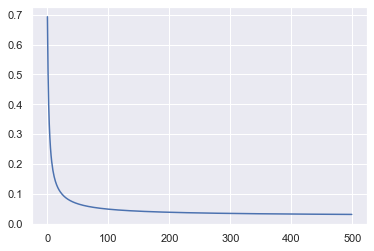

In [24]:
plt.plot(err_list)

##### Let's Visualize the Decision Boundary

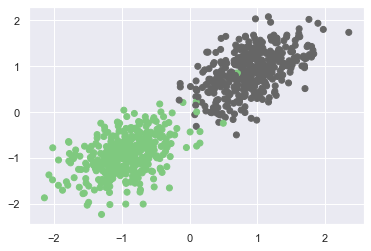

In [25]:
plt.scatter(X_train[:,0],X_train[:,1],c = Y_train.reshape((-1),), cmap = plt.cm.Accent)
plt.show()

In [26]:
x1 = np.arange(-3,4)

x2 = -(theta[0] + (theta[1] * x1)) / theta[2]

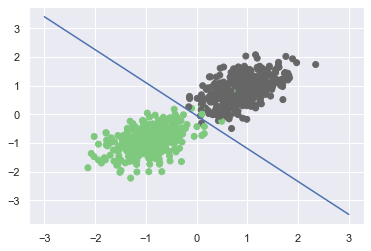

In [27]:
plt.plot(x1,x2)
plt.scatter(X_train[:,0],X_train[:,1],c = Y_train.reshape((-1),), cmap = plt.cm.Accent)
plt.show()

##### Let's do some predictions and accuracy.

In [28]:
def prediction(X,theta):
    hi = hypothesis(X,theta)
    output = hi
    
    for i in range(output.shape[0]):
        if output[i] >= 0.5:
            output[i] = 1
            
        else:
            output[i] = 0
    output = output.astype('int')
    return output       

In [29]:
X_train_pred = prediction(X_new_train,theta)

In [30]:
X_new_test = sm.add_constant(X_test)

In [31]:
X_test_pred = prediction(X_new_test,theta)

In [32]:
def accuracy(actual,predicts):
    
    actual = actual.astype('int')
    acc = np.sum(actual == predicts) / actual.shape[0]
    
    return acc*100

In [33]:
accuracy(Y_train,X_train_pred)

99.25

#### Logistic Regression Using SK-Learn

In [34]:
from sklearn.linear_model import LogisticRegression

In [35]:
model = LogisticRegression()

In [36]:
model.fit(X_train,Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [37]:
model.intercept_

array([0.13065309])

In [38]:
model.coef_

array([[3.79391338, 3.06644864]])

In [39]:
model.score(X_train,Y_train)

0.9925

In [40]:
model.score(X_test,Y_test)

0.98

In [41]:
y_pred = model.predict(X_test)

In [42]:
y_pred.shape

(200,)